# TensorFlow: Neural Style Transfer

In [36]:
%run c:\Users\8304018\Documents\GitHub\peforth\playground\jupyter-extension.py 

c:\Users\8304018\Documents\GitHub\peforth\playground\jupyter-extension.py
p e f o r t h    v1.28
source code http://github.com/hcchengithub/peforth
Type 'peforth.ok()' to enter forth interpreter, 'exit' to come back.



# Setup
Import and configure modules

In [ ]:
# 用 !conda install tensorflow 過了 11m 沒反應被咱 click the vs code jupyter notebook cell 左邊的 Interrupt button 關掉了。
# 改用 !pip install tensorflow 也是沒反應，過了一會兒跑出來了。檢查，確定 conda list 無之； pip list 有之。 venv Orange3 沒錯。
!pip install tensorflow

In [ ]:
!pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
!where python
display(os.getcwd())
display(sys.argv)

C:\Program Files\Orange\python.exe
C:\Users\8304018\AppData\Local\Microsoft\WindowsApps\python.exe


'c:\\Users\\8304018\\Documents\\GitHub\\examples-for-data-scientists\\Playground'

['C:\\Users\\8304018\\AppData\\Roaming\\Python\\Python38\\site-packages\\ipykernel_launcher.py',
 '--ip=127.0.0.1',
 '--stdin=9023',
 '--control=9021',
 '--hb=9020',
 '--Session.signature_scheme="hmac-sha256"',
 '--Session.key=b"c8a5d0dd-10c1-4545-a0b4-386774a886fb"',
 '--shell=9022',
 '--transport="tcp"',
 '--iopub=9024',
 '--f=C:\\Users\\8304018\\AppData\\Local\\Temp\\tmp-23296z5RCUXk3M5Ou.json']

In [6]:
import os
import tensorflow as tf

In [7]:
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

# 這堆好多不認得，竟然也過了！用 Orange3 的 venv 好處多多。

# Download images and choose a style image and a content image:

In [17]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [18]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

204800/195196 [===============================] - 0s 0us/step


# Visualize the input

Define a function to load an image and limit its maximum dimension to 512 pixels.

In [47]:
def load_img(path_to_img): 
  # path_to_img is something like: r"c:\Users\8304018\Downloads\20200608-1231-UP-1(0608).jpg" 
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

Create a simple function to display an image:

In [21]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

11>11>content_path --> C:\Users\8304018\.keras\datasets\YellowLabradorLooking_new.jpg (<class 'str'>)
11>C:\Users\8304018\.keras\datasets\YellowLabradorLooking_new.jpg11>11>11>style_path --> C:\Users\8304018\.keras\datasets\kandinsky5.jpg (<class 'str'>)
11>11>11>11>

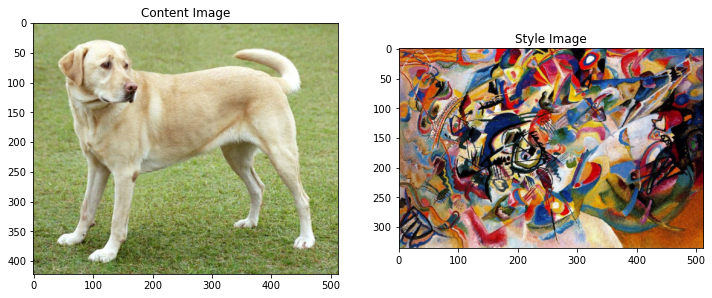

In [37]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

# Fast Style Transfer using TF-Hub

This tutorial demonstrates the original style-transfer algorithm, which optimizes the image content to a particular style. Before getting into the details, let’s see how the [TensorFlow Hub model](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) does this:

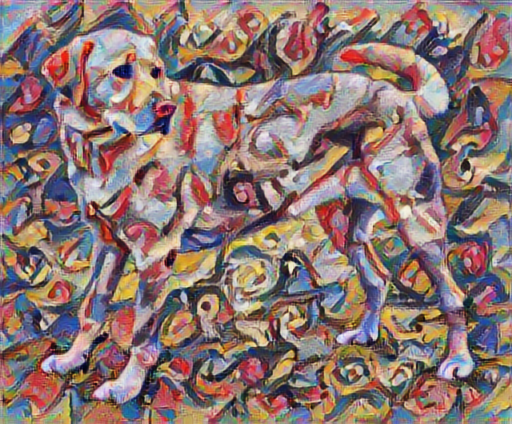

In [25]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

以上一下就成功了，本文還長得很。。。。。。。

# 筆記

### 嘗試用自己的圖片

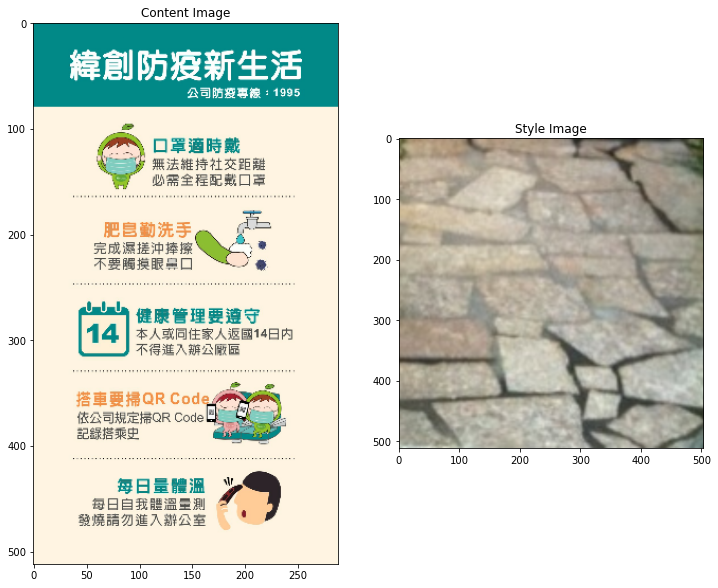

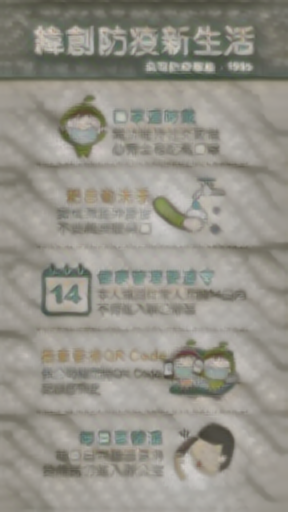

In [53]:
content_image = load_img(r"c:\Users\8304018\Downloads\20200608-1231-UP-1(0608).jpg") 
style_image = load_img(r"c:\Users\8304018\Downloads\style.jpg")
plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')
plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')
plt.show()
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)